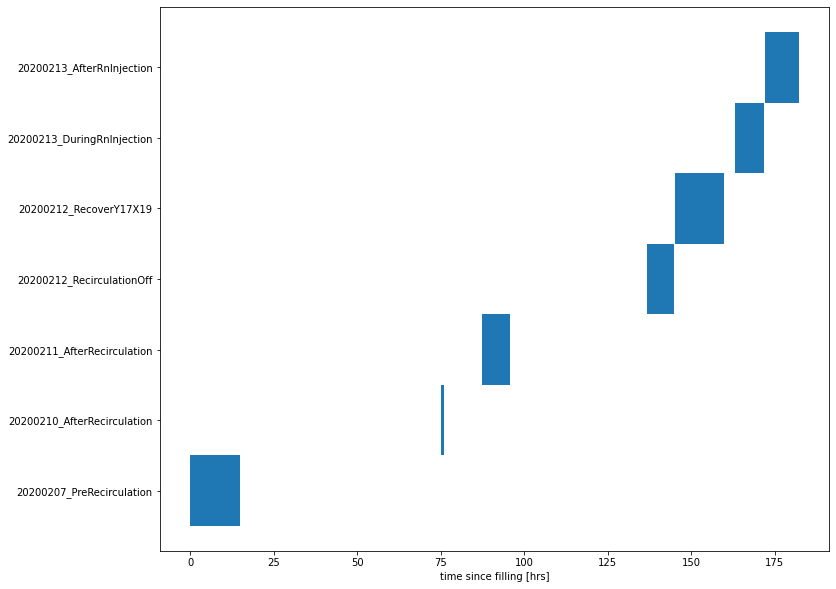

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import glob

plt.rcParams['figure.figsize'] = [12, 10]

first = True
i=0
delta_x = []
width_x = []
path_to_reduced = '/p/lustre1/jacopod/29th/TMS_analysis/'
folder_list = glob.glob(path_to_reduced+'202002*/')

for folder in folder_list:
    flist = sorted(glob.glob(folder + '*_reduced.h5'))
    fname = datetime.strptime(flist[0].split('/')[-1].split('_')[2], '%Y%m%d%H%M%S')
    lname = datetime.strptime(flist[-1].split('/')[-1].split('_')[2], '%Y%m%d%H%M%S')
    if first:
        start_run = fname
        first = False
    delta_x.append((fname-start_run).days*24+(fname-start_run).seconds/3600.0)
    width_x.append((lname-fname).days*24+(lname-fname).seconds/3600.0)
    
sorted_start = sorted(delta_x-np.min(delta_x))#,width_x
sorted_width = [x for _,x in sorted(zip(delta_x-np.min(delta_x),width_x))]
sorted_folder = [x for _,x in sorted(zip(delta_x-np.min(delta_x),(f_l.split('/')[-2] for f_l in folder_list)))]

width_y = 1
for i,e in enumerate(sorted_start):
    plt.broken_barh([(e,sorted_width[i])],(i*width_y,width_y))
    
plt.xlabel('time since filling [hrs]')
plt.yticks(np.arange(len(sorted_start)) + 0.5,sorted_folder)
plt.show()
    